In [2]:
#Imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.utils import shuffle
from sklearn.decomposition import PCA 
from sklearn.metrics import accuracy_score,r2_score,plot_confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Empezamos viendo como se nos presenta el dataset

In [3]:
data=pd.read_csv("./iris.csv")
data.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
#Información básica:
print("Nombre de las características{}".format(data.columns.values[:-1]))
print("Nombre de al columna de la variable objetivo -> {}".format(data.columns.values[-1]))

Nombre de las características['Sepal.Length' 'Sepal.Width' 'Petal.Length' 'Petal.Width']
Nombre de al columna de la variable objetivo -> Species


In [5]:
#Identificadas las columnas y la variable objetivo, veamos información útil del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Comenzamos con la exploración de los datos

En primer lugar para poder hacer un buen análisis debemos estar seguros de que contamos con suficientes ejemplos para cada variable objetivo

Text(0, 0.5, 'Frecuencia')

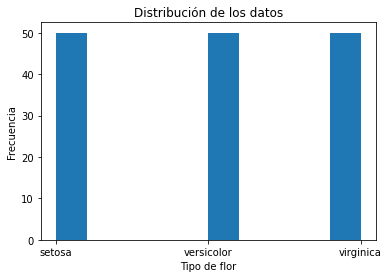

In [6]:
plt.hist(data["Species"])
plt.title("Distribución de los datos")
plt.xlabel("Tipo de flor")
plt.ylabel("Frecuencia")

Vemos que tenemos suficientes datos de cada tipo y podemos continuar sin hacer ningún arreglo

Veamos ahora una distribución de la clasificación de las especies dependiendo del valor de sus características, además podremos ver de forma simple si presentan mucha varianza

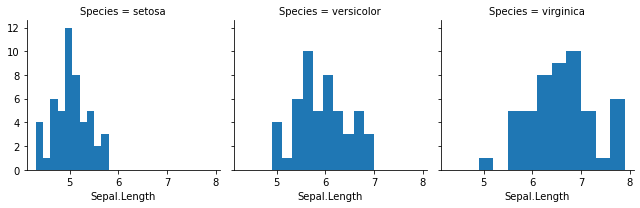

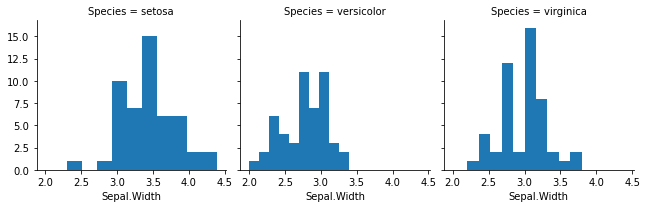

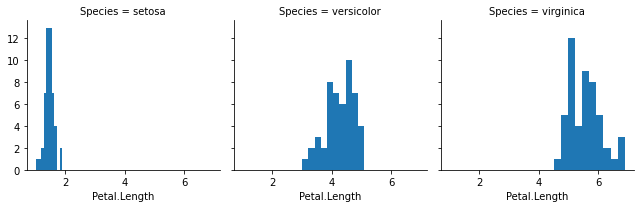

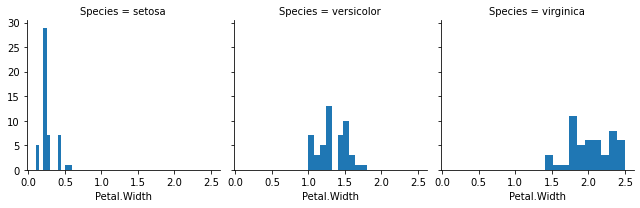

In [7]:
for columna in data.drop(["Species"],axis=1).columns.values.tolist():
    g= sns.FacetGrid(data, col="Species")
    g.map(plt.hist, columna ,bins=10)

Veamos ahora si hay correlación entre algunas variables

<AxesSubplot:>

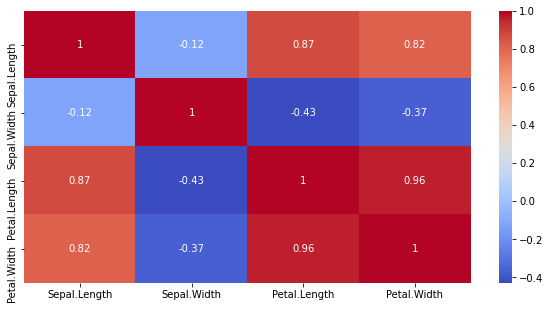

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

Vemos que sepal width(anchura del sépalo) es la variable más independiente, por lo que seguramente no haga falta que trabajemos con todas las variables. Las variables con las que trabajaremos lo decidiremos más adelante

### Preprocesamiento de los datos

En primer lugar vamos a convertir la variable objetivo a enteros para que sea más fácil trabajar con ella.

In [9]:
indice={"setosa":0,"versicolor":1,"virginica":2}
for i in range(len(data)):
    if data.loc[i,"Species"]=="setosa":
        data.loc[i,"Species"]=int(0)
    elif data.loc[i,"Species"]=="versicolor":
        data.loc[i,"Species"]=int(1)
    elif data.loc[i,"Species"]=="virginica":
        data.loc[i,"Species"]=int(2)

In [10]:
datos=data.columns.values[:-1].tolist()
target=data.columns.values[-1:].tolist()

In [11]:
X,y=shuffle(data[datos],data[target],random_state=10)

#### ACP (selección de variables)

Vamos a probar con dos componentes y con 3 para ver cual nos conviene coger en relación accuracy del resultado con número de variables escogidas.

In [12]:
#3 variables
pca_3=PCA(n_components=3)
X_pca_3= pca_3.fit_transform(X)
X_train3,X_test3,y_train3,y_test3=train_test_split(X_pca_3,y,test_size=0.2)
y_train3=y_train3.to_numpy().reshape(len(X_train3)).astype(int)
y_test3=y_test3.to_numpy().reshape(len(y_test3)).astype(int)

In [13]:
#2 variables
pca_2=PCA(n_components=2)
X_pca_2=pca_2.fit_transform(X)
X_train2,X_test2,y_train2,y_test2=train_test_split(X_pca_2,y,test_size=0.2)
y_train2=y_train2.to_numpy().reshape(len(X_train2)).astype(int)
y_test2=y_test2.to_numpy().reshape(len(y_test2)).astype(int)

### Entrenamiento de un modelo inicial

Se trata de un modelo de clasificación de aprendizaje supervisado, luego vamos a probar unos cuantos algoritmos para que veamos cual optimizar y el número de variables a utilizar 

#### Logistic Regression

In [14]:
model3 = LogisticRegression()
model3.fit(X_train3,y_train3)
prediction_logistic3 = model3.predict(X_test3)
acc_log3 = round(accuracy_score(prediction_logistic3,y_test3) * 100,4)
print('La precisión (accuracy) de la regresión logistica es {}%'.format(acc_log3))

La precisión (accuracy) de la regresión logistica es 100.0%


In [15]:
model2 = LogisticRegression()
model2.fit(X_train2,y_train2)
prediction_logistic2 = model2.predict(X_test2)
acc_log2 = round(accuracy_score(prediction_logistic2,y_test2) * 100, 4)
print('La precisión (accuracy) de la regresión logistica es {}%'.format(acc_log2))

La precisión (accuracy) de la regresión logistica es 100.0%


#### Decision Tree Classifier

In [16]:
model3 = DecisionTreeClassifier()
model3.fit(X_train3, y_train3)
prediction_tree3 = model3.predict(X_test3)
acc_tree3 = round(accuracy_score(prediction_tree3,y_test3) * 100, 4)
print('La precisión (accuracy) del decision tree clasiffier es {}%'.format(acc_tree3))

La precisión (accuracy) del decision tree clasiffier es 93.3333%


In [17]:
model2 = DecisionTreeClassifier()
model2.fit(X_train2, y_train2)
prediction_tree2 = model2.predict(X_test2)
acc_tree2 = round(accuracy_score(prediction_tree2,y_test2) * 100, 4)
print('La precisión (accuracy) del decision tree clasiffier es {}%'.format(acc_tree2))

La precisión (accuracy) del decision tree clasiffier es 96.6667%


#### Support Vector Machine

In [18]:
model3=SVC()
model3.fit(X_train3,y_train3)
prediction_svc3=model3.predict(X_test3)
acc_svc3=round(accuracy_score(prediction_svc3,y_test3) * 100, 4)
print('La precisión (accuracy) del SVC es {}%'.format(acc_svc3))

La precisión (accuracy) del SVC es 96.6667%


In [19]:
model2=SVC()
model2.fit(X_train2,y_train2)
prediction_svc2=model2.predict(X_test2)
acc_svc2=round(accuracy_score(prediction_svc2,y_test2) * 100, 4)
print('La precisión (accuracy) del SVC es {}%'.format(acc_svc2))

La precisión (accuracy) del SVC es 100.0%


#### Gaussian Naive Bayes

In [20]:
model3=GaussianNB()
model3.fit(X_train3,y_train3)
prediction_gnb3=model3.predict(X_test3)
acc_gnb3=round(accuracy_score(prediction_gnb3,y_test3) * 100, 4)
print('La precisión (accuracy) de Gaussian Naive Bayes es {}%'.format(acc_gnb3))

La precisión (accuracy) de Gaussian Naive Bayes es 90.0%


In [21]:
model2=GaussianNB()
model2.fit(X_train2,y_train2)
prediction_gnb2=model2.predict(X_test2)
acc_gnb2=round(accuracy_score(prediction_gnb2,y_test2) * 100, 4)
print('La precisión (accuracy) de Gaussian Naive Bayes es {}%'.format(acc_gnb2))

La precisión (accuracy) de Gaussian Naive Bayes es 90.0%


#### Decisión

Hemos probado muchos algoritmos y he llegado a la conclusión de que lo más óptimo será utilizar dos componentes ya que obtenemos casi idénticos resultados con la ventaja de utilizar menos características. 
Por otro lado vamos a profundizar y optimizar nuestro algoritmo de Logistic Regression que hemos obtenido el mejor accuracy

### Optimización del modelo

In [22]:
#Vamos a intentar los valores óptimos de regularización y ver que algoritmo de optimización (solver) es mejor usar
logistic=LogisticRegression(multi_class="ovr")
lambdas = [ 1e-1, 1e1, 1e2, 1e3,1e5]
cs = [1/x for x in lambdas]
solvers=["liblinear","lbfgs"]

parametros=[{"C":cs,"solver":solvers}]
n_folds=5

grid=GridSearchCV(estimator=logistic,param_grid=parametros, cv=n_folds)

grid.fit(X_train2,y_train2)

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='ovr'),
             param_grid=[{'C': [10.0, 0.1, 0.01, 0.001, 1e-05],
                          'solver': ['liblinear', 'lbfgs']}])

In [23]:
print("Mejores parámetros", grid.best_params_)
print("Ïndice del C válido", grid.best_index_)
print("Mejor modelo", grid.best_estimator_)
# Dicho esto, vamos a guardar el mejor modelo para trabajar con él
best_model=grid.best_estimator_

Mejores parámetros {'C': 10.0, 'solver': 'lbfgs'}
Ïndice del C válido 1
Mejor modelo LogisticRegression(C=10.0, multi_class='ovr')


### Evaluación sobre el subset de test

#### Mediante representación de residuos

Precisión media: 1.00


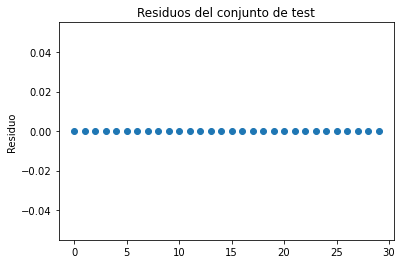

In [24]:
y_test_pred = best_model.predict(X_test2)

#Accuracy
mean_accuracy =r2_score(y_test2,y_test_pred)

print('Precisión media: %.2f' % mean_accuracy)

def residuos(y,y_pred):
    diff=abs(y-y_pred)
    return diff
res = residuos(y_test2,y_test_pred)

# Representamos gráficamente
Xtest_res=np.arange(len(y_test2))
plt.figure()
plt.ylabel("Residuo")
plt.title("Residuos del conjunto de test")

plt.scatter(Xtest_res,res)

plt.show()

#### Mediante la matriz de confusión 

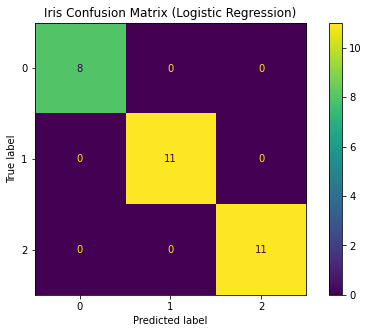

In [25]:
plt.rcParams['figure.figsize'] = 8, 5
plot_confusion_matrix(best_model, X_test2,y_test2)

plt.title('Iris Confusion Matrix (Logistic Regression)')
plt.show()

#### Mediante la matriz de correlación

In [26]:
report = classification_report(y_test2, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Conclusión

Hemos realizado un estudio acerca del dataset iris y hemos comprobado que no todas las caracterísitcas importan en referencia a sus pétalos y sépalos si no que cogiendos las dos características principales es suficiente. Además regularizamos el problema sacrificando algo de precisión pero asegurándonos no caer en desviación o varianza. 